# Football Match Prediction Model ---- using Spanish Super League Dataset

In [1]:
# importing packages
import pandas as pd
import numpy as np
from scipy.interpolate import interp1d

# for plots
import matplotlib.pyplot as plt
from matplotlib.dates import date2num

# for date and time processing
import datetime

# for statistical graphs
import seaborn as sns

# for machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

<a id="dataset"></a>
### Getting the dataset from Kaggle

In [2]:
# getting the dataset 
train = pd.read_csv("../DataSets/FMEL_Dataset.csv")

### Checking the dataset

In [3]:
# checking the dataset
print (train.head (10))

   id   season  division  round           localTeam         visitorTeam  \
0   1  1970-71         1      1  Atletico de Bilbao           Barcelona   
1   2  1970-71         1      1          Las Palmas  Atletico de Madrid   
2   3  1970-71         1      1         Real Madrid            Valencia   
3   4  1970-71         1      1       Celta de Vigo   Sporting de Gijon   
4   5  1970-71         1      1               Elche             Granada   
5   6  1970-71         1      1             Espanol             Sevilla   
6   7  1970-71         1      1            Sabadell       Real Sociedad   
7   8  1970-71         1      1            Zaragoza           CD Malaga   
8   9  1970-71         1      2            Valencia          Las Palmas   
9  10  1970-71         1      2  Atletico de Madrid  Atletico de Bilbao   

   localGoals  visitorGoals        date  timestamp  
0           1             1  12/09/1970   21938400  
1           1             1  12/09/1970   21938400  
2           2  

In [4]:
# checking the dataset
print (train.tail (10))
# we have 36305 rows (starts with 0)

          id   season  division  round               localTeam  \
37137  37138  2017-18         2     42                 Granada   
37138  37139  2017-18         2     42                 Cordoba   
37139  37140  2017-18         2     42                Tenerife   
37140  37141  2017-18         2     42                    Lugo   
37141  37142  2017-18         2     42  Gimnastic de Tarragona   
37142  37143  2017-18         2     42              Valladolid   
37143  37144  2017-18         2     42                  Oviedo   
37144  37145  2017-18         2     42                Alcorcon   
37145  37146  2017-18         2     42                Numancia   
37146  37147  2017-18         2     42       Barcelona Atletic   

             visitorTeam  localGoals  visitorGoals        date   timestamp  
37137              Cadiz           2             1  02/06/2018  1527890400  
37138  Sporting de Gijon           3             0  02/06/2018  1527890400  
37139           Albacete           1      

<a id="information-dataset"></a>
### Information about the dataset

**Attributes given in the dataset**
1. id
2. season
3. division
4. round
5. local team or, home team
6. visitor team or, away team
7. home goals or, local goals
8. visitor goals
9. date
10. time stamp

In [5]:
# checking infos about data 
print (train.info())
# from the output of this line, we can learn that there is no null values in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37147 entries, 0 to 37146
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            37147 non-null  int64 
 1   season        37147 non-null  object
 2   division      37147 non-null  int64 
 3   round         37147 non-null  int64 
 4   localTeam     37147 non-null  object
 5   visitorTeam   37147 non-null  object
 6   localGoals    37147 non-null  int64 
 7   visitorGoals  37147 non-null  int64 
 8   date          37147 non-null  object
 9   timestamp     37147 non-null  int64 
dtypes: int64(6), object(4)
memory usage: 2.8+ MB
None


<a id="description-dataset"></a>
### Description about the dataset

In [6]:
# for statistical descriptions 
print (train.describe())

                 id      division         round    localGoals  visitorGoals  \
count  37147.000000  37147.000000  37147.000000  37147.000000  37147.000000   
mean   18574.000000      1.537809     19.862896      1.515385      0.936953   
std    10723.559561      0.498575     11.282774      1.262742      1.010263   
min        1.000000      1.000000      1.000000      0.000000      0.000000   
25%     9287.500000      1.000000     10.000000      1.000000      0.000000   
50%    18574.000000      2.000000     20.000000      1.000000      1.000000   
75%    27860.500000      2.000000     29.000000      2.000000      1.000000   
max    37147.000000      2.000000     44.000000     10.000000      8.000000   

          timestamp  
count  3.714700e+04  
mean   8.116889e+08  
std    4.322134e+08  
min    2.133360e+07  
25%    4.453884e+08  
50%    8.317656e+08  
75%    1.181426e+09  
max    1.527890e+09  


### Details of Non-numeric attributes

In [7]:
# for details of non-numeric attributes
print (train.describe(include=['O']))
# from the output of this line, we can learn that most number of matches were played in 2010-11 
# season, "Sporting de Gijon" is the team which played most number of the matches in both 
# local and outside, on 02/06/1991, most number of matches were played on a single day

         season          localTeam        visitorTeam        date
count     37147              37147              37147       37147
unique       48                115                115        4589
top     2017-18  Sporting de Gijon  Sporting de Gijon  01/11/2000
freq        842                915                915          20


<a id="analysis-dataset"></a>
### Analysis of the Dataset

In [8]:
# creating new feature "local_won"
# I am creating a new column called "local_won" based on "localGoals" and "visitorGoals" columns,
# which will tell us if the match is won by local team or not. If that particular match is won by 
# local team, 1 is shown if not 0.

def f(row):
    if row['localGoals'] > row['visitorGoals']:
        val = 1
    else:
        val = 0
    return val
train['local_won'] = train.apply(f, axis=1)


In [9]:
# check the "local_won" column added at the last
print (train.head ())

   id   season  division  round           localTeam         visitorTeam  \
0   1  1970-71         1      1  Atletico de Bilbao           Barcelona   
1   2  1970-71         1      1          Las Palmas  Atletico de Madrid   
2   3  1970-71         1      1         Real Madrid            Valencia   
3   4  1970-71         1      1       Celta de Vigo   Sporting de Gijon   
4   5  1970-71         1      1               Elche             Granada   

   localGoals  visitorGoals        date  timestamp  local_won  
0           1             1  12/09/1970   21938400          0  
1           1             1  12/09/1970   21938400          0  
2           2             0  12/09/1970   21938400          1  
3           2             0  13/09/1970   22024800          1  
4           1             1  13/09/1970   22024800          0  


In [10]:
# creating new feature "visitor_won"
# I am creating a new column called "visitor_won" based on "localGoals" and "visitorGoals" columns,
# which will tell us if the match is won by visitor team or not. If that particular match is won by 
# visitor team, 1 is shown if not 0.

def g(row):
    if row['visitorGoals'] > row['localGoals']:
        val = 1
    else:
        val = 0
    return val
train ["visitor_won"] = train.apply(g, axis=1)


In [11]:
# check the "visitor_won" column added at the last
print (train.head ())

   id   season  division  round           localTeam         visitorTeam  \
0   1  1970-71         1      1  Atletico de Bilbao           Barcelona   
1   2  1970-71         1      1          Las Palmas  Atletico de Madrid   
2   3  1970-71         1      1         Real Madrid            Valencia   
3   4  1970-71         1      1       Celta de Vigo   Sporting de Gijon   
4   5  1970-71         1      1               Elche             Granada   

   localGoals  visitorGoals        date  timestamp  local_won  visitor_won  
0           1             1  12/09/1970   21938400          0            0  
1           1             1  12/09/1970   21938400          0            0  
2           2             0  12/09/1970   21938400          1            0  
3           2             0  13/09/1970   22024800          1            0  
4           1             1  13/09/1970   22024800          0            0  


In [12]:
# creating new feature "match_draw"
# I am creating a new column called "match_draw" based on "localGoals" and "visitorGoals" columns,
# which will tell us if the match was tie or not. If that particular match was not won by anyone, 
# 1 is shown if not 0.

def h(row):
    if row['visitorGoals'] == row['localGoals']:
        val = 1
    else:
        val = 0
    return val
train ["match_draw"] = train.apply(h, axis=1)

In [13]:
# check the "match_draw" column added at the last
print (train.head ())

   id   season  division  round           localTeam         visitorTeam  \
0   1  1970-71         1      1  Atletico de Bilbao           Barcelona   
1   2  1970-71         1      1          Las Palmas  Atletico de Madrid   
2   3  1970-71         1      1         Real Madrid            Valencia   
3   4  1970-71         1      1       Celta de Vigo   Sporting de Gijon   
4   5  1970-71         1      1               Elche             Granada   

   localGoals  visitorGoals        date  timestamp  local_won  visitor_won  \
0           1             1  12/09/1970   21938400          0            0   
1           1             1  12/09/1970   21938400          0            0   
2           2             0  12/09/1970   21938400          1            0   
3           2             0  13/09/1970   22024800          1            0   
4           1             1  13/09/1970   22024800          0            0   

   match_draw  
0           1  
1           1  
2           0  
3           0  


#### Creating the new features and adding it to the dataset

In [14]:
# creating new feature "total_goals"
# since it is the direct addition of two columns, we are not using IF statement
train['total_goals'] = train['visitorGoals'] + train['localGoals']

In [15]:
# check newly created "total_goals" column
train.head ()

,id,season,division,round,localTeam,visitorTeam,localGoals,visitorGoals,date,timestamp,local_won,visitor_won,match_draw,total_goals
0,1,1970-71,1,1,Atletico de Bilbao,Barcelona,1,1,12/09/1970,21938400,0,0,1,2
1,2,1970-71,1,1,Las Palmas,Atletico de Madrid,1,1,12/09/1970,21938400,0,0,1,2
2,3,1970-71,1,1,Real Madrid,Valencia,2,0,12/09/1970,21938400,1,0,0,2
3,4,1970-71,1,1,Celta de Vigo,Sporting de Gijon,2,0,13/09/1970,22024800,1,0,0,2
4,5,1970-71,1,1,Elche,Granada,1,1,13/09/1970,22024800,0,0,1,2


#### Checking the new features

C:\Users\USER\AppData\Local\Temp\ipykernel_5860\912322038.py:5: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='both', color='Black',linestyle='-')


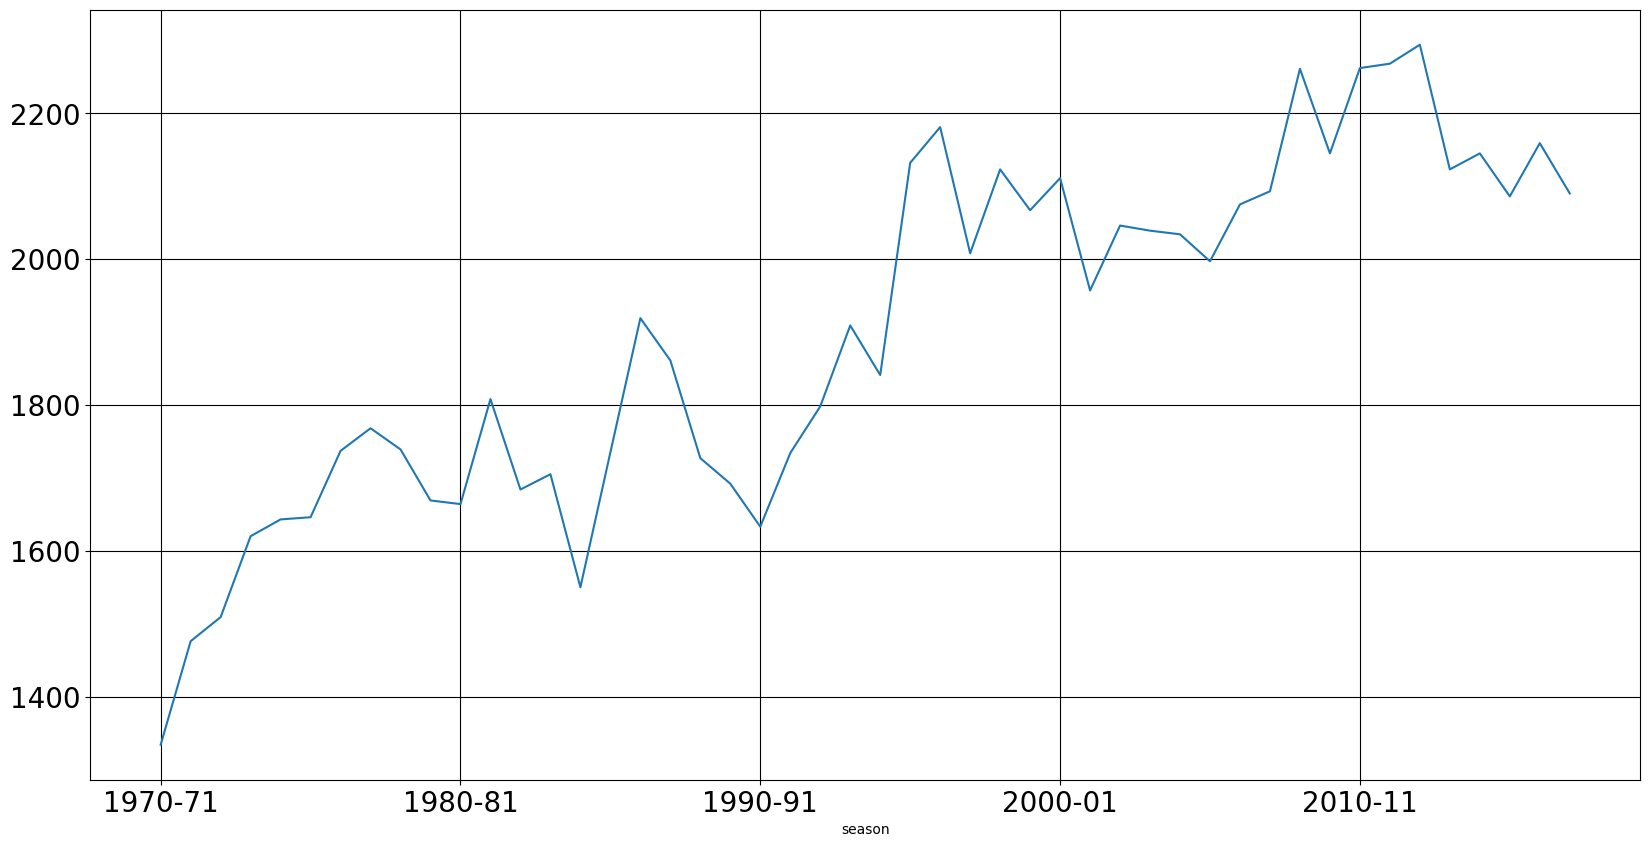

In [16]:
# checking how the total goals tread has been changed over seasons
fig = plt.figure(figsize=(20, 10))
batman = train.groupby('season')['total_goals'].sum()
batman.plot (kind="line", fontsize = 20)
plt.grid(b=True, which='both', color='Black',linestyle='-')
plt.show ()
# from the below chart, we can learn that total number of goals scored in every season have gone up 
# over the past 47 years

C:\Users\USER\AppData\Local\Temp\ipykernel_5860\1446940436.py:5: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='both', color='Black',linestyle='-')


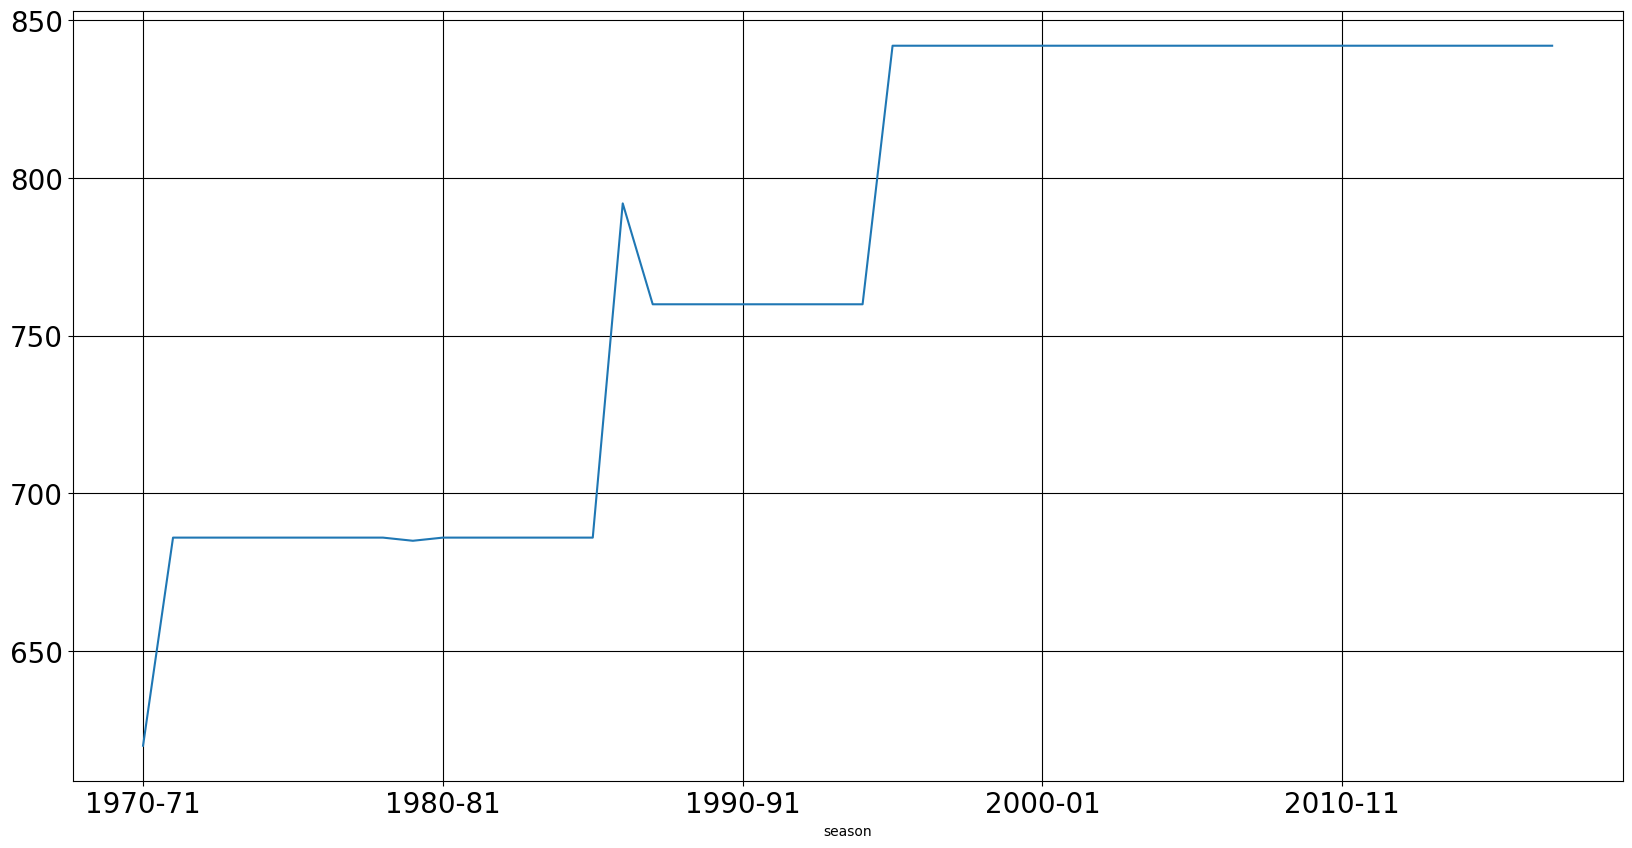

In [17]:
# lets check the trend of total matches played in these 47 years in each season
fig = plt.figure(figsize=(20, 10))
superman = train.groupby('season')['division'].count()
superman.plot (kind="line", fontsize = 20)
plt.grid(b=True, which='both', color='Black',linestyle='-')
plt.show ()
# from the below chart, we can confirm that total number of matches played in each season also
# went up. This is one of the main reason for increase in total number of goals 


<a id="most-win"></a>
### Checking : Which team won mostly?

In [18]:
# checking which team won mostly
# by analysing the output, we can confirm that local team is most likely to win the match
winning_percent = train[['season', 'local_won', 'visitor_won', 'match_draw']].groupby(['season'], 
     as_index=False).mean().sort_values(by='season')
print (winning_percent)

     season  local_won  visitor_won  match_draw
0   1970-71   0.596774     0.132258    0.270968
1   1971-72   0.594752     0.153061    0.252187
2   1972-73   0.577259     0.145773    0.276968
3   1973-74   0.648688     0.118076    0.233236
4   1974-75   0.629738     0.103499    0.266764
5   1975-76   0.637026     0.129738    0.233236
6   1976-77   0.604956     0.128280    0.266764
7   1977-78   0.628280     0.102041    0.269679
8   1978-79   0.623907     0.131195    0.244898
9   1979-80   0.589781     0.135766    0.274453
10  1980-81   0.562682     0.180758    0.256560
11  1981-82   0.577259     0.182216    0.240525
12  1982-83   0.545190     0.170554    0.284257
13  1983-84   0.534985     0.177843    0.287172
14  1984-85   0.510204     0.176385    0.313411
15  1985-86   0.558309     0.190962    0.250729
16  1986-87   0.568182     0.171717    0.260101
17  1987-88   0.513158     0.217105    0.269737
18  1988-89   0.461842     0.252632    0.285526
19  1989-90   0.502632     0.200000    0

### Analysis depending on the factor of Local won or, Home Match

In [19]:
# showing the average of local_won, visitor_won and match_draw
# this clearly shows that local team have won 51.1% of the overall matches played.
# 21.3% matches were won by visitor teams and 27.5% matches were went tie
print (winning_percent[['local_won', 'visitor_won', 'match_draw']].mean())

local_won      0.510847
visitor_won    0.214058
match_draw     0.275095
dtype: float64


<a id="graph"></a>
### Graphical Visualization

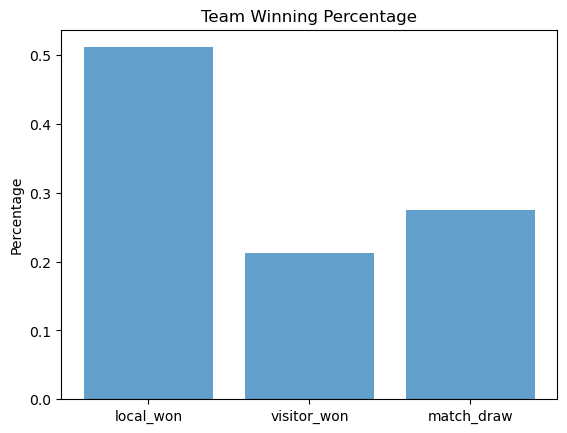

In [20]:
# chart to display teams that won most of the time
objects = ('local_won', 'visitor_won', 'match_draw')
y_pos = np.arange(len(objects))
performance = [0.511558,0.213002,0.275440]
 
plt.bar(y_pos, performance, align='center', alpha=0.7)
plt.xticks(y_pos, objects)
plt.ylabel('Percentage')
plt.title('Team Winning Percentage')
plt.show ()

# its obvious from the below chart that teams that played in their own land are twice more
# likely to win the match

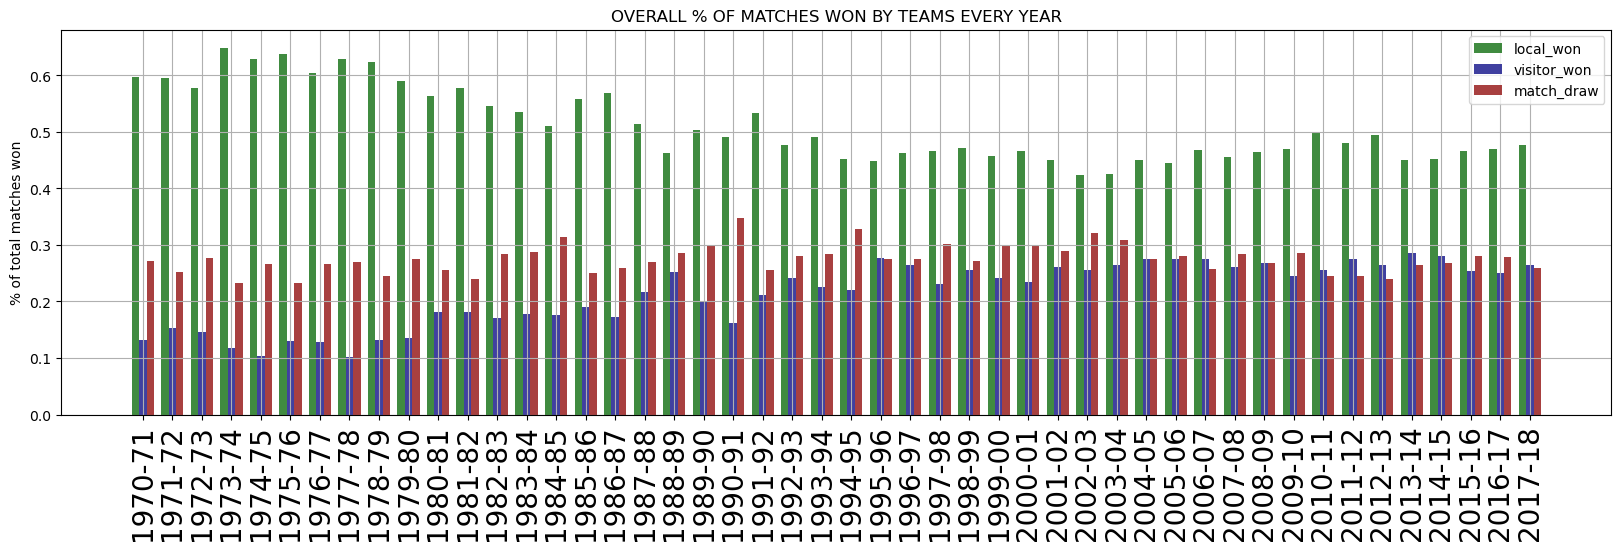

In [21]:
# plotting the bar graph to prove this
pos = list(range(len(winning_percent['local_won'])))
width = 0.25

fig, ax = plt.subplots(figsize=(20,5))

plt.bar(pos, winning_percent['local_won'], width, alpha=0.75, color='#006400')
plt.bar([p + width for p in pos], winning_percent['visitor_won'], width, alpha=0.75, color='#000080')
plt.bar([p + width*2 for p in pos], winning_percent['match_draw'], width, alpha=0.75, color='#8B0000')

ax.set_title('OVERALL % OF MATCHES WON BY TEAMS EVERY YEAR')
ax.set_ylabel('% of total matches won')

ax.set_xticks([p + 1 * width for p in pos])
ax.set_xticklabels(winning_percent['season'], rotation=90, fontsize = 20)

plt.legend(['local_won', 'visitor_won', 'match_draw'], loc='upper right')

plt.grid()
plt.show()

# from the below chart, its very obvious that when teams get to play in their own land, 
# tends to win the match than a team that goes to a foreign land for a match.

**Conclusion from the analysis**

It is being seen that over the 30 years of the Spanish Super League, the home team is always having the advantages over the away team or, the visitor team. The home team is having the advantage twice of that the away team is having. And also the advantage of the away team is approximately same as the game might be draw for both of the sides.

Hence, the local team is always having the advantages!

In [22]:
# lets check which team won most of the matches when played in home land
teams = train.groupby('localTeam')['local_won'].sum().sort_values(ascending=True)
print (teams)
# below are the teams won most of the times in their homeland:


localTeam
Mollerussa                     1
Alicante                       2
Burgos CF                      4
Moscardo                       5
Universidad de Las Palmas      5
                            ... 
Sevilla                      521
Valencia                     531
Atletico de Madrid           556
Barcelona                    668
Real Madrid                  675
Name: local_won, Length: 115, dtype: int64


### Conclusion from the match winner analysis

**Most Successful Clubs**
1. Real Madrid
2. Barcelona
3. Atletico Madrid
4. Valencia
5. Sevilla

### Plotting the visualization and analysis

C:\Users\USER\AppData\Local\Temp\ipykernel_5860\1957977900.py:5: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='both', color='Black',linestyle='-')


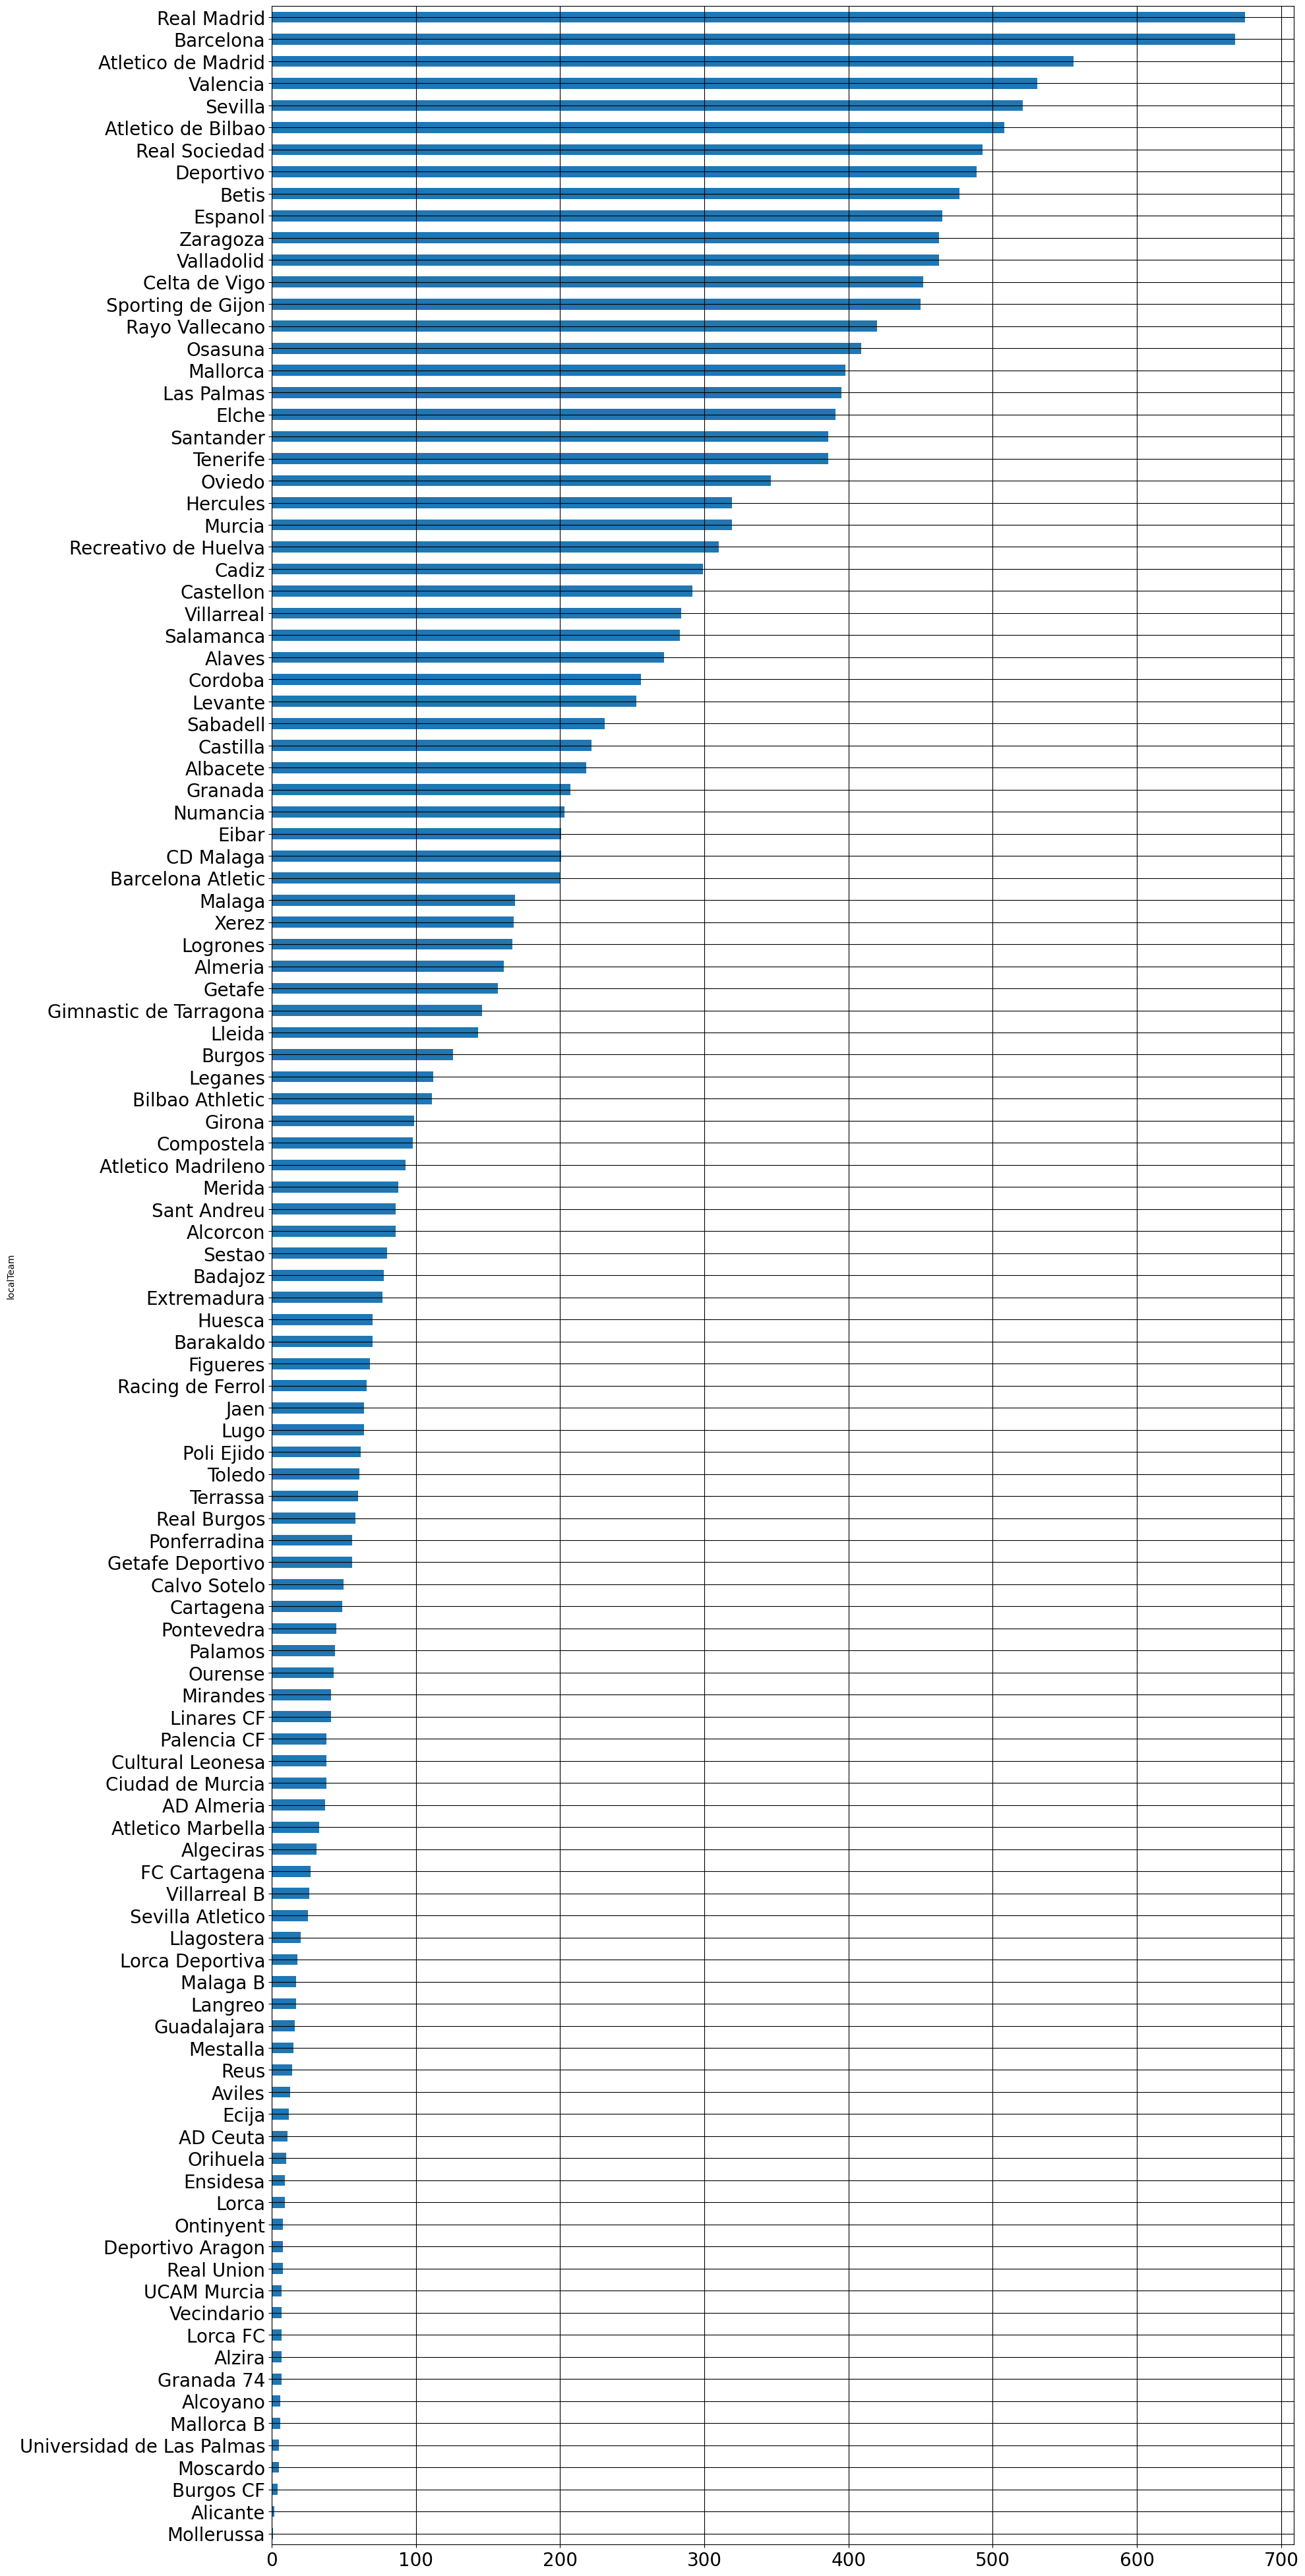

In [23]:
# lets plot this data in a horizontal chart
fig = plt.figure(figsize=(20,50))
teams = train.groupby('localTeam')['local_won'].sum().sort_values(ascending=True)
teams.plot(kind="barh", fontsize = 20)
plt.grid(b=True, which='both', color='Black',linestyle='-')
plt.show ()
# from the below chart, its clear that Real Madrid is the team that won most of the matches, followed 
# by Barcelona very closely

In [24]:
# I am going to analyze how many matches are totally played in every month
train['game_month'] = pd.to_datetime(train['date'], format='%d/%m/%Y')
train['game_date'] = train['game_month'].dt.month
train['game_weekday'] = train['game_month'].dt.weekday


<AxesSubplot:xlabel='game_month'>

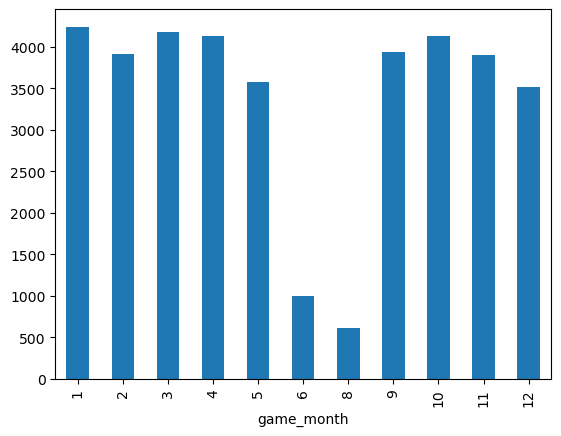

In [25]:
train.groupby([train['game_month'].dt.month])['round'].count().plot(kind='bar')

<AxesSubplot:xlabel='game_weekday'>

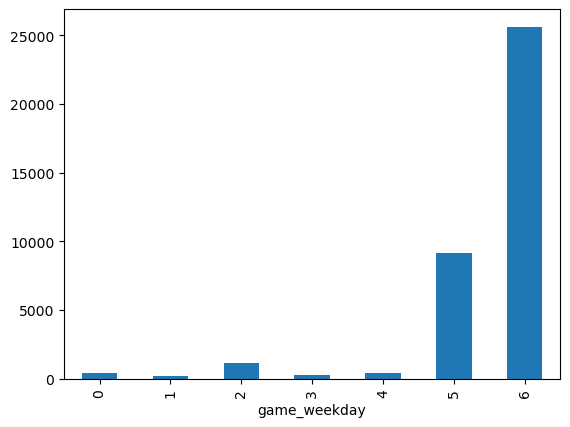

In [26]:
# Looks like most games are played on the weekend :)
train.groupby('game_weekday')['round'].count().plot(kind='bar')

**Most of the matches were played through the whole year, except the month of July and June. Because, the mid of the year is the time where the season is ending and the new season is starting!**

**Most of the matches were played in the weekends, so that the audience enjoy the football very much!**

*****************************************************************

##  Prediction Model Creation

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from time import time
from sklearn.metrics import f1_score
from os import path, makedirs, walk
from joblib import dump, load
import json

In [28]:
data = pd.read_csv('../DataSets/FMEL_Dataset.csv')
data.head()

,id,season,division,round,localTeam,visitorTeam,localGoals,visitorGoals,date,timestamp
0,1,1970-71,1,1,Atletico de Bilbao,Barcelona,1,1,12/09/1970,21938400
1,2,1970-71,1,1,Las Palmas,Atletico de Madrid,1,1,12/09/1970,21938400
2,3,1970-71,1,1,Real Madrid,Valencia,2,0,12/09/1970,21938400
3,4,1970-71,1,1,Celta de Vigo,Sporting de Gijon,2,0,13/09/1970,22024800
4,5,1970-71,1,1,Elche,Granada,1,1,13/09/1970,22024800


In [29]:
pd.DataFrame (data.corr().round(2))

,id,division,round,localGoals,visitorGoals,timestamp
id,1.00,0.02,0.08,-0.05,0.12,1.00
division,0.02,1.00,0.06,-0.06,-0.05,-0.00
round,0.08,0.06,1.00,0.01,0.02,0.09
localGoals,-0.05,-0.06,0.01,1.00,0.02,-0.05
visitorGoals,0.12,-0.05,0.02,0.02,1.00,0.13
timestamp,1.00,-0.00,0.09,-0.05,0.13,1.00


In [30]:
x = data['localGoals']

In [31]:
y = data['visitorGoals']

In [32]:
x = pd.DataFrame(x)
y = pd.DataFrame(y)

<a id="train-test-split"></a>
**Training and Testing Dataset Spliting using the `train_test_split`**
  
  * Immporting the library from the sklearn.model_selection
  * Split the dataset into 80:20 ratio
  * x_train1 and y_train1 are the trainning datasets
  * x_test1 and y_test1 are the testing datasets
  * After the spliting of the datasets the model is ready to be prepared!

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x,y, test_size = 0.2)

<a id="logreg"></a>
### Logistic Regression 

Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regression (or logit regression) is estimating the parameters of a logistic model (a form of binary regression).

In [35]:
logReg = LogisticRegression(max_iter = 5000)

In [36]:
logReg.fit(x_train1, y_train1)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=5000)

In [37]:
logReg.score(x_test1, y_test1)

0.3955585464333782

### Decision Tree Classifier Algorithm



In [38]:
dtc = DecisionTreeClassifier()

In [39]:
dtc.fit(x_train1, y_train1)

DecisionTreeClassifier()

In [40]:
dtc.score(x_test1, y_test1)

0.39650067294751007

**Decision Tree Classifier Algorithm using the criterion = entropy parameter**

In [41]:
dtce = DecisionTreeClassifier(criterion = 'entropy')

In [42]:
dtce.fit(x_train1, y_train1)

DecisionTreeClassifier(criterion='entropy')

In [43]:
dtce.score(x_test1, y_test1)

0.39650067294751007

### Random Forest Classifier Algorithm

In [44]:
rfc = RandomForestClassifier()


In [45]:
rfc.fit(x_train1, y_train1)

C:\Users\USER\AppData\Local\Temp\ipykernel_5860\3191942279.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(x_train1, y_train1)


RandomForestClassifier()

In [46]:
rfc.score(x_test1, y_test1)

0.39663526244952896


### K-Nearest Neighbours Algorithm

In [47]:
from sklearn.neighbors import KNeighborsClassifier  

In [48]:
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 ) 

In [49]:
classifier.fit(x_train1, y_train1)  

C:\Users\USER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [50]:
classifier.score(x_test1, y_test1)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.3825033647375505


### Gausian NB Algorithm

In [51]:
clf = GaussianNB()

In [52]:
clf.fit(x_train1, y_train1) 

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [53]:
clf.score(x_test1, y_test1)

0.26285329744279945


### Support Vector Machine Algorithm

In [54]:
svm = SVC()

In [55]:
svm.fit(x_train1, y_train1)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [56]:
svm.score(x_test1, y_test1)

0.3978465679676985

Conclusion:
